# Quantum Simulation

In [8]:
!pip install qiskit ipywidgets
!pip install pylatexenc

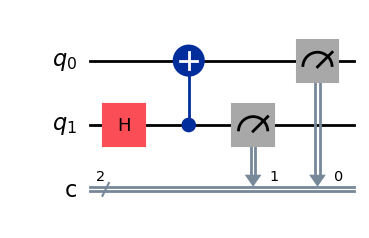

In [9]:
# first we wanna define a circuit with 2 qubits ( Bell-state flipped)
from qiskit import QuantumCircuit
qc=QuantumCircuit(2,2)
qc.h(1)
qc.cx(1,0)
qc.measure([1,0],[1,0]) #qubit first,then classical bits 
qc.draw('mpl')

In [10]:
!pip install qiskit-aer

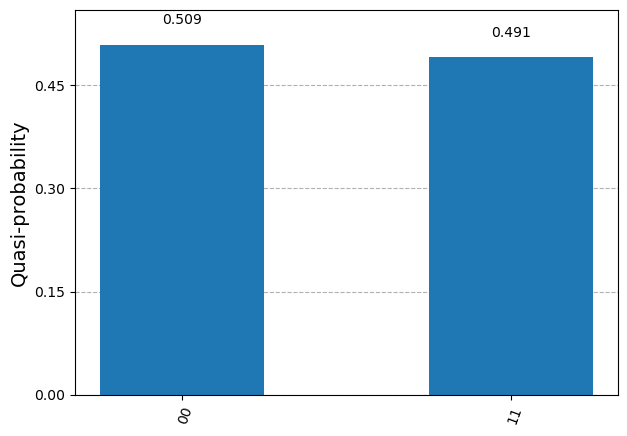

In [11]:
#When we wanna transpile the circuit, we also need to talk about the backend as well
from qiskit import transpile  # there is no box that it doesn't know about,so transpile is not really needed for this circuit 
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_distribution
# we wanna have access to what we did,we know it's doing it randomly but it needs to be accessible as well, so seed is needed
simulator_aer=AerSimulator(seed_simulator=42) #seed_simulator could be anything & the result could be repeated using same seed
qc_aer= transpile(qc,backend=simulator_aer)#should specify the backend ( using the object we defined before)
result_ideal=simulator_aer.run(qc_aer,shots=1024).result()
counts_ideal=result_ideal.get_counts()

plot_distribution(counts_ideal) # giving us quasi-probability


from bell-state, this is what we expect having 50/50 chance for 00 and 11, with no noise involved

Now using depolarizing noise:
noise didn't change much on this version of qiskit

for depolarizing noise, we need to know that when we have no noise, we show the state using state vector, but 
that is not the case when noise is pressent, since we will have mixed state when having noise
we can only show mixed state using density matrix which is combination of state vectors with corresponding probability

#Deploraizing Noise:
Deploraizing noise represents aquantum operation where,with probability(p), the state of the qubits is replaced by
the maximally mixed state:
rho -> (1-p)*rho+(p/d)* identity matrix
where rho is the density matrix of the qubits,and d is. the dimension of the Hilbert space ( for n qubits, dimension is d=2^n
in this simulation, the noise model aplies the deplorizing error with probability(p=0.1) to all 2-qubit CX gates, reflecting relaistic noise behavior in quantum devices

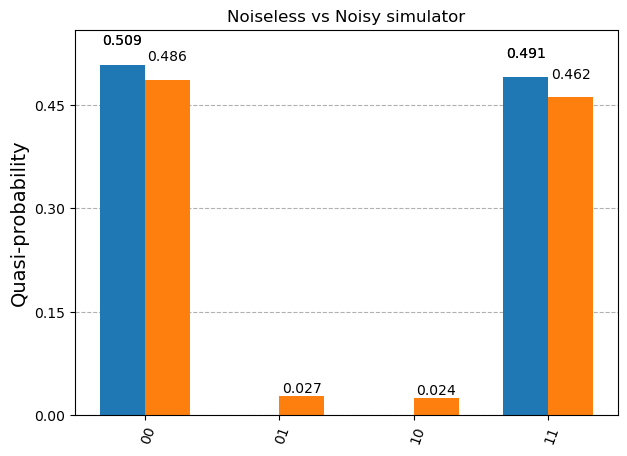

In [15]:
#qiskit_aer could apply noise, while Basic_simulator can't do it
from qiskit_aer import noise
# we need to define the probability for it, then defining the error object using noise class, using deploraizing_error()
prob=0.1
error= noise.depolarizing_error(prob,2) # the dimension of hilbert space is specified using number of qubits here as 2
#so by only specifying the number of qubits here, the dimension of hilbert space is automatically found for us
#Now using noise_model using the noise class 
noise_model=noise.NoiseModel()
# using the command .add_all_qubit_quantum_error(error object, the gate that it suposed to act on it)
noise_model.add_all_qubit_quantum_error(error,['cx'])

#definig the gate for it, using noise model object.basis_gates 
basis_gates=noise_model.basis_gates
#finally we get the noisy results, using qc circuit with 1024 shots, using noise model as defined, and using the gate which is our channel 
result_noisy= simulator_aer.run(qc, 
                               shots=1024,
                              noise_model=noise_model,
                              basis_gates=basis_gates).result()
#using get.counts() to get counts of noisy results
counts_noisy=result_noisy.get_counts()

#for plot-distribution we can give it a list to plot it besides other results for comparison ( eg: ideal vs noisy)
# we can also give the plot an apropriate title
plot_distribution([counts_ideal,counts_noisy],title='Noiseless vs Noisy simulator')

Now, ploting with noisy ones, we have output for 01 & 10 as well, ideal one is the blue one

Parametric circuits:

Simulate locally (CPU/GPU -> using Google Colab)
We can use Qiskit for simulation ( using quantum_infor ( for Stetevector, DEnsityMatrix,Operator)
or providers(BasicSimulator), primitives(Statevector Sampler,StatevectorEstimator)-> using version 2 here )
Qiskit Aer (AerSimulator(statevector,Densitymatrix,unitary,...))
Qiskit IBM Runtime -> primitives -> Sampleer Estimator
Qiskit IBM Provider deprecated

#Primitives: the smallest processing instructionfor a given absteraction level
Runnig on Backends
it provies circuits + number of shots
Run on specified bakend
get counts for each circuit

Primitive could help speeding up, providing us with sampler and estimator
What we did up until now, we defined a quantum circuits with specific amounts of shots, it was given to the backend
then getting counts as output. Now using primitive, we have sampler which would basically returns shot by shot bit string sampled from the probability distribution of the quantum state prepared on the device
primitives: Basic functional block to run slightly higher-level quantum programs/ return more than counts as output
Sampler: Samples output state of a circuit ( eg. a probability distribution )

sampler gets pub(which is a quantum circuit, giving parameters, and number of shots)
(also to elaborate more here, you can give multiple quantum circuits as pub, also it doesn't have to be parameteric but it better be, also for each circuit, you can choose different number of shots)
Now, this pub is given to sampler, sampler interacts with backend(backend corespponds given what you asked for ( which could be Statevector, density matrix, using BasicSimulator, AerSimulator,Fake backend,QPU) then it would provide you with probability distribution (just as get.counts we had before, but now for parametric circuits that would run for each parameter, and would get output. We wanna work with sampler code now:

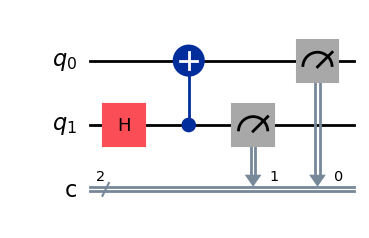

In [22]:
from qiskit.primitives import StatevectorSampler, StatevectorEstimator #using version2 now
qc.draw('mpl')


In [23]:
#define an object to put StatevectorSampler in it
sampler=StatevectorSampler()
#defining a job, to run our circuit
job_simulator=simulator_aer.run(qc,shots=1024)

as seen before, we defined jobs before, and using simulators to get results for it, now can we do same thing for Sampler regarding to defining job?

In [26]:
job_sampler=sampler.run(qc,shots=1024)

ValueError: An invalid Sampler pub-like was given (<class 'qiskit._accelerate.circuit.CircuitInstruction'>). If you want to run a single circuit, you need to wrap it with `[]` like `sampler.run([circuit])` instead of `sampler.run(circuit)`.

We can see the error, telling us I need pub as my input, and my sample should be pub (which is a quantum circuit
with parameters and number of shots given in a list), now let's do it


In [28]:
# for now our circuit doesn't have parameter whch could be left as blank, or mentioned as 'none'
job_sampler=sampler.run([qc],shots=1024) 

# if having multiple pub, could determine the number of shots for all of them, or could specify the number of pub 
# for each circuit individually, here we specified a general shot
#note that pubs should be in a list always

In [32]:
#So your circuit should be inside the list, to make it work as a pub
#now getting results from samplet:
result_sampler=job_sampler.result()

#reminder: job is the step before before getting results (sometimes could skip it and get results without it)

In [33]:
#The result we have from Aer_simulator:
print(counts_ideal)


{'11': 503, '00': 521}


In [34]:
#THe result is the dictionary, now see if we can use same approach to get sampler result:
counts_sampler=result_sampler.get_counts()

AttributeError: 'PrimitiveResult' object has no attribute 'get_counts'

In [36]:
#THe error shows we don't have .get_counts() command here
#Now how to get the result:
print(result_sampler)

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'shots': 1024, 'circuit_metadata': {}})], metadata={'version': 2})


#We're getting a list that is the pub output, and we have data in it, in that data it has classical variable,bit array

In [38]:
#Now in this list, we give 0 index, to see what we'll get:
print(result_sampler[0])

SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'shots': 1024, 'circuit_metadata': {}})


In [40]:
#Now we wanna see the data:
print(result_sampler[0].data)

DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=2>))


In [41]:
#Now in the output of first pub, we have a Bit Array, shown with c
#now what is this c?
print(result_sampler[0].data.c)

BitArray(<shape=(), num_shots=1024, num_bits=2>)


#Now having the Bit Array, on Bit Array, command get_counts() is working, just similar to what we get from Aer Simulator

In [43]:
print(result_sampler[0].data.c.get_counts())

{'00': 510, '11': 514}


Now what's up with the c ? it's the classiccal register we can visually see on circuit

Trying the sampler on parametric circuit, and see why we have this c ?

We can add classical register to quantum circuit, and give classical register an arbitrary name instead of c

Applying measure could change the name of classical register, which will be observed below

if getting error for c, draw the ccircuit and see what classical register is called, to use that name

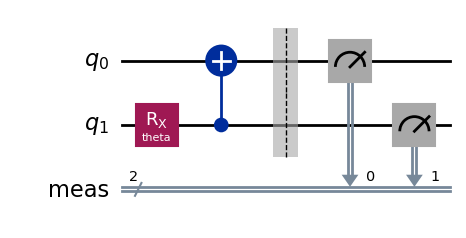

In [49]:
#wanna have multiple circuits, to have 2 pubs and see how it works
from qiskit.circuit import Parameter
theta=Parameter('theta')
qc2=QuantumCircuit(2)
qc2.rx(theta,1)
qc2.cx(1,0)
qc2.measure_all()
qc2.draw('mpl')

We could see that the name of classical register is now named as 'meas'

In [51]:
from math import pi

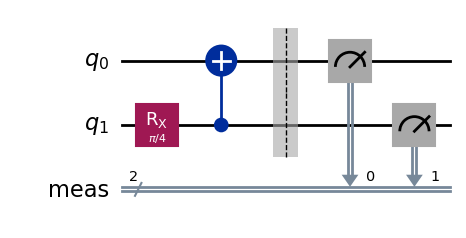

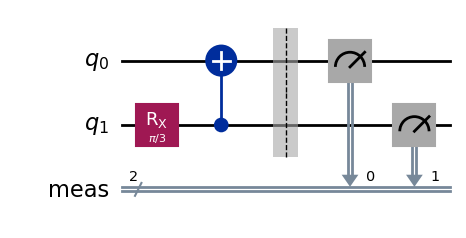

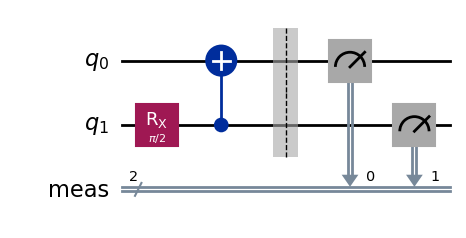

In [55]:
#Now we wanna define a list of parameters now:
angles=[[pi/4],[pi/3],[pi/2]]
#now we wanna assign the parameters, having an empty list, such that we make a list by entering parameters here
circuits=[]
for angle in angles:
    qc_temp=qc2.assign_parameters({theta:angle[0]})
    circuits.append(qc_temp)
# we have a list with one variable,so we need to specify the index : theta:angle[0]
# then we append them to circuit
#Now if we want to have more parameters,we can do as such:
for i in range(len(angles)):
    display(circuits[i].draw('mpl'))

So now we have for circuits, how we obtain them?
we defined a list of angles with their values, then defining empty list for circuits, that we each time
append to it,such that the assigned angles are applied to each circuit, now having theta.angle[0] specify that
we take one variable from angles each time, then we append it on our circuit list, having 3 circuits then draw it
using i= length of list, show the corresponding circuit to us

In [58]:
# we can transpile all the circuits at once
circuits_transpiled=transpile(circuits, backend=simulator_aer)
result_simulator=simulator_aer.run(circuits_transpiled, shots=1024).result()
# getting results of transpiled circuits all at once
# avoiding job in above code

In [60]:
# when working with simulator, we need to define for to get results, but sampler helps alot to ease coding
#getting results of each circuit individually:
counts_simulator=[]
for i in range(len(angles)):
    result_temp=result_simulator.get_counts(i)  # having i get results individually, putting it in result_temp
    counts_simulator.append(result_temp) #append command here is for python here, not qiskit append here
print(counts_simulator)

[{'11': 129, '00': 895}, {'11': 257, '00': 767}, {'00': 512, '11': 512}]


we get result of circuits for each parameter in above code

In [64]:
#Now let's run sampler on 2nd quantum circuits (qc2), giving it pub and all that, to get the result:
result_sampler=sampler.run([(qc2,angles)],shots=1024).result()

In [66]:
print(result_sampler)

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(3,), num_shots=1024, num_bits=2>), shape=(3,)), metadata={'shots': 1024, 'circuit_metadata': {}})], metadata={'version': 2})


In [71]:
counts_sampler=[]
for i in range(len(angles)):
    result_temp=result_sampler[0].data.meas.get_counts(i) #changing classical register to meas
    counts_sampler.append(result_temp)
    
print(counts_sampler)

[{'00': 881, '11': 143}, {'00': 770, '11': 254}, {'00': 510, '11': 514}]


we observed sampler could record all data, beforehand for simulator, we needed for loop to make it run, now using
sampler, we only need the for loop for getting the results

In [74]:
print(result_sampler[0].data.meas.get_counts())

{'00': 2161, '11': 911}


giving us the collective behavior, if having .get_counts() without i inside bracket

In [75]:
print(result_simulator.get_counts())

[{'11': 129, '00': 895}, {'11': 257, '00': 767}, {'00': 512, '11': 512}]


compare result_simulator, doesn't give us the collective values 

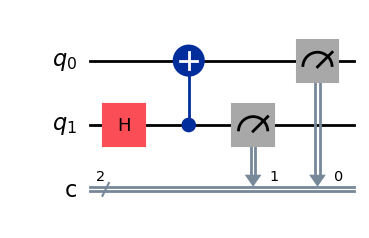

In [77]:

qc.draw('mpl')

In [78]:
#Now defining multiple pubs:
result_sampler=sampler.run([(qc2,angles),(qc,None)],shots=1024).result()
#Now, sampler could do all with two pubs(super fast and efficient in comparison to using simulator)

In [90]:
for i in range(len(angles)):
    print(f"First pub's result with {i}th angle of the list: {result_sampler[0].data.meas.get_counts(i)}.") #meas here

#the qc2 is not the parametric circuit, so we can get results as such:
print(f"Second Pub's result: {result_sampler[1].data.c.get_counts()}") # c here

First pub's result with 0th angle of the list: {'00': 898, '11': 126}.
First pub's result with 1th angle of the list: {'00': 764, '11': 260}.
First pub's result with 2th angle of the list: {'11': 529, '00': 495}.
Second Pub's result: {'00': 506, '11': 518}


having collective behavior of the 3 circuits we had at first

In [91]:
print(result_sampler[0].data.meas.get_counts())

{'00': 2157, '11': 915}


In [92]:
#Now, having individual shots for each circuit
result_sampler=sampler.run([(qc2,angles,1024),(qc,None,100)]).result()

In [93]:
for i in range(len(angles)):
    print(f"First pub's result with {i}th angle of the list: {result_sampler[0].data.meas.get_counts(i)}.") #meas here

#the qc2 is not the parametric circuit, so we can get results as such:
print(f"Second Pub's result: {result_sampler[1].data.c.get_counts()}") # c here

First pub's result with 0th angle of the list: {'00': 884, '11': 140}.
First pub's result with 1th angle of the list: {'11': 262, '00': 762}.
First pub's result with 2th angle of the list: {'11': 486, '00': 538}.
Second Pub's result: {'11': 58, '00': 42}


seeing that the shots for 2nd sampler reduced to 100

We got the statevector sampleer from qiskit and this is still using quantum_info in its backend for this compuation
knowing that for quantum_info, having a mid-circuit measurement would give us error here.
mid-circuit measurement here means that, it measures and given the measuremen, it applies the gate (so for it, the control is a classical bit)


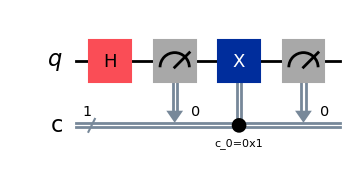

In [98]:
qc=QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
qc.x(0).c_if(0,1) # CNoT on qubit 0, when bit 0 was measured as 1
qc.measure(0,0)
qc.draw('mpl')

In [100]:
#Now we again define the result_sampler
result_sampler=sampler.run([qc],shots=1024).result()

QiskitError: 'StatevectorSampler cannot handle ControlFlowOp and c_if'

'StatevectorSampler cannot handle ControlFlowOp and c_if'
this error means: it simply couldn't handle the mixed circuit measurement 

Estimator:
Sampler gets pub, given the backend, the output is a probability distribution (telling how many times a perticular result was observed)
Estimator is used when we wanna deal with expectation values
Expectation value need an obsservable, and that observable is with respect to which axis you wanna perform measurement. You can make any observable you like using estimators

#Estimators: Computers expectation values of observables with the respective states prepared by quantum circuits

Primitives:
Basic foundation block to run slightly higher-level quantum programs
Return more than just counts as output
Estimator: Estimates expectation values of state with respect to observables

For estimator, it's allowed to have multiple observables(having mixture of operators/ quantum tomography, how to get expectation value for a specific observable
can have multiple pubs as well, it also needs precision. it also intercat with backend, then giving an expectation value


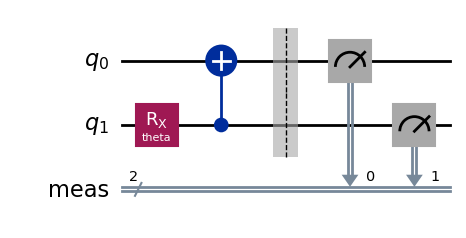

In [104]:
# having parametric circuit
qc2.draw('mpl')

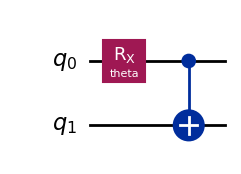

In [112]:
#mixed circuit measurement shouldn't have samplers,also estimator should not have measurement since it's gonna do measurement at the end itself
# so we need a circuitwith no measurement, let's define a new circuit for this goal:
qc2=QuantumCircuit(2)
qc2.rx(theta,0)
qc2.cx(0,1)
qc2.draw('mpl')

In [110]:
#Estimator Code:
from qiskit.quantum_info import SparsePauliOp  # could use it to make any observable we like
#making list of observables, having 2 qubits, so we need 2 observables ( called"xx" as arbitrary observable)
obsv=[
    [SparsePauliOp(["XX","IY"],[0.5,0.5])],  # corresponding coefficient here is 0.5
    [SparsePauliOp(["XX"],[1])] #define the next observable
]
   


In [116]:
#making estimator object
estimator=StatevectorEstimator()
result_estimator=estimator.run([(qc2,obsv,angles,0.1)]).result() # the argument is the pub as list
# what pub has to have as estimator?  circuit,observable,parameter, and precision(0.1) ( No shots here)

In [117]:
#getting results, using evs as expecttion values
result_estimator[0].data.evs

array([[ 0.05394925, -0.01108253, -0.05389885],
       [ 0.0033058 ,  0.11497404, -0.18893987]])

given that we have 2 observables,and 3 angles, we would have 6 outputs ( 6 expectation values)